# Analyse en Composantes Principales (ACP)

L'**analyse en composantes principales** (ACP ou PCA en anglais pour *Principal Component Analysis*), est une méthode de la famille de l'analyse des données et plus généralement de la statistique multivariée, qui consiste à transformer des variables liées entre elles (dites « corrélées ») en nouvelles variables décorrélées les unes des autres. Ces nouvelles variables sont nommées « composantes principales » ou axes principaux. Elle permet au statisticien de résumer l'information en réduisant le nombre de variables.


Il s'agit d'une approche à la fois géométrique (les variables étant représentées dans un nouvel espace, selon des directions d'inertie maximale) et statistique (la recherche portant sur des axes indépendants expliquant au mieux la variabilité — la variance — des données). Lorsqu'on veut compresser un ensemble de $N$ variables aléatoires, les $n$ premiers axes de l'analyse en composantes principales sont un meilleur choix, du point de vue de l'inertie ou de la variance. 

Dans ce chapitre, nous utilisons l'ACP pour analyser la série chronologique des taux de fécondité dans $192$ pays, en utilisant des données obtenues auprès de la Banque mondiale. L'objectif principal est de comprendre comment les tendances de la fécondité dans le temps diffèrent d'un pays à l'autre.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.multivariate.pca import PCA

plt.rc("figure", figsize=(20, 12))
plt.rc("font", size=14)

Les données peuvent être obtenues à partir du [World Bank web site](http://data.worldbank.org/indicator/SP.DYN.TFRT.IN). On travaille ci-dessous avec une version légèrement nettoyée des données.

In [2]:
data = sm.datasets.fertility.load_pandas().data
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN


On construit un DataFrame qui contient uniquement les données numériques sur le taux de fécondité, et on définit l'indice sur les noms de pays. Les pays dont les données sont manquantes (`na`) seront éliminés.

In [3]:
columns = list(map(str, range(1960, 2012)))
data.set_index("Country Name", inplace=True)
dta = data[columns]
dta = dta.dropna()
dta.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.825,1.805,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.484,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395
Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,7.339,...,6.778,6.743,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099
Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,5.160,...,2.195,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748
United Arab Emirates,6.928,6.910,6.893,6.877,6.861,6.841,6.816,6.783,6.738,6.679,...,2.428,2.329,2.236,2.149,2.071,2.004,1.948,1.903,1.868,1.841


Il existe deux façons d'utiliser l'ACP pour analyser une matrice rectangulaire : il est possible de traiter les lignes comme des "objets" et les colonnes comme des "variables", ou vice-versa. Ici, on considère les mesures de la fécondité comme des "variables" utilisées pour mesurer les pays comme des "objets". Ainsi, l'objectif sera de réduire les valeurs annuelles du taux de fécondité à un petit nombre de "profils" ou de "fonctions de base" du taux de fécondité qui capturent la plupart des variations dans le temps dans les différents pays.

La tendance moyenne est supprimée dans l'ACP, mais il est intéressant d'y jeter un coup d'œil. Elle montre que la fécondité a une tendance baissière au cours de la période couverte par cet ensemble de données. La moyenne est calculée en utilisant un pays comme unité d'analyse, sans tenir compte de la taille de la population.

(0.0, 51.0)

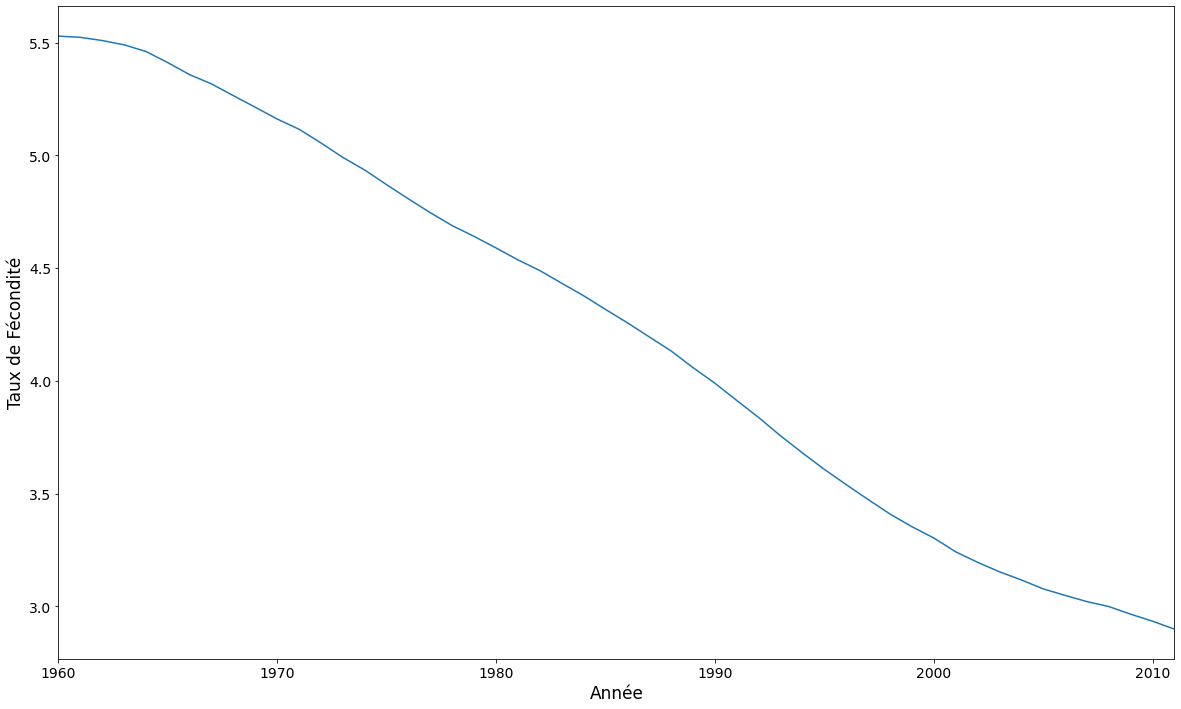

In [5]:
ax = dta.mean().plot(grid=False)
ax.set_xlabel("Année", size=17)
ax.set_ylabel("Taux de Fécondité", size=17)
ax.set_xlim(0, 51)

Après, on effectue l'analyse en composantes principales au travers de la fonction `PCA`. Les paramètres pris en charge sont :

+ `data` : `array_like`
    >Variables en colonnes, observations en lignes.

+ `ncomp` : `int`, optionnel
    >Nombre de composants à retourner. À défaut de valeur, la fonction renvoie le plus petit nombre de lignes ou de colonnes des données.

+ `standardize` : `bool`, optionnel
    >Indiquant qu'il faut utiliser des données standardisées avec une moyenne de $0$ et une variance unitaire. Si spécifié à `true`, le jeu de données sera forcément centré. L'utilisation de données normalisées est équivalente au calcul des composantes principales à partir de la matrice de corrélation des données.

+ `demean` : `bool`, optionnel
    >Indiquant s'il faut centrer les données avant de calculer les composantes principales. `demean` est ignoré si `standardize` est spécifé à `True`. Centrer les données sans les normaliser équivaut à calculer les composantes principales à partir de la matrice de covariance des données.

In [6]:
pca_model = PCA(dta.T, standardize=False, demean=True)

Compte tenu des valeurs propres, il est évident que le premier composant principal est prépondérant, avec une petite quantité potentielle de variation significative capturée par le deuxième et troisième composant.

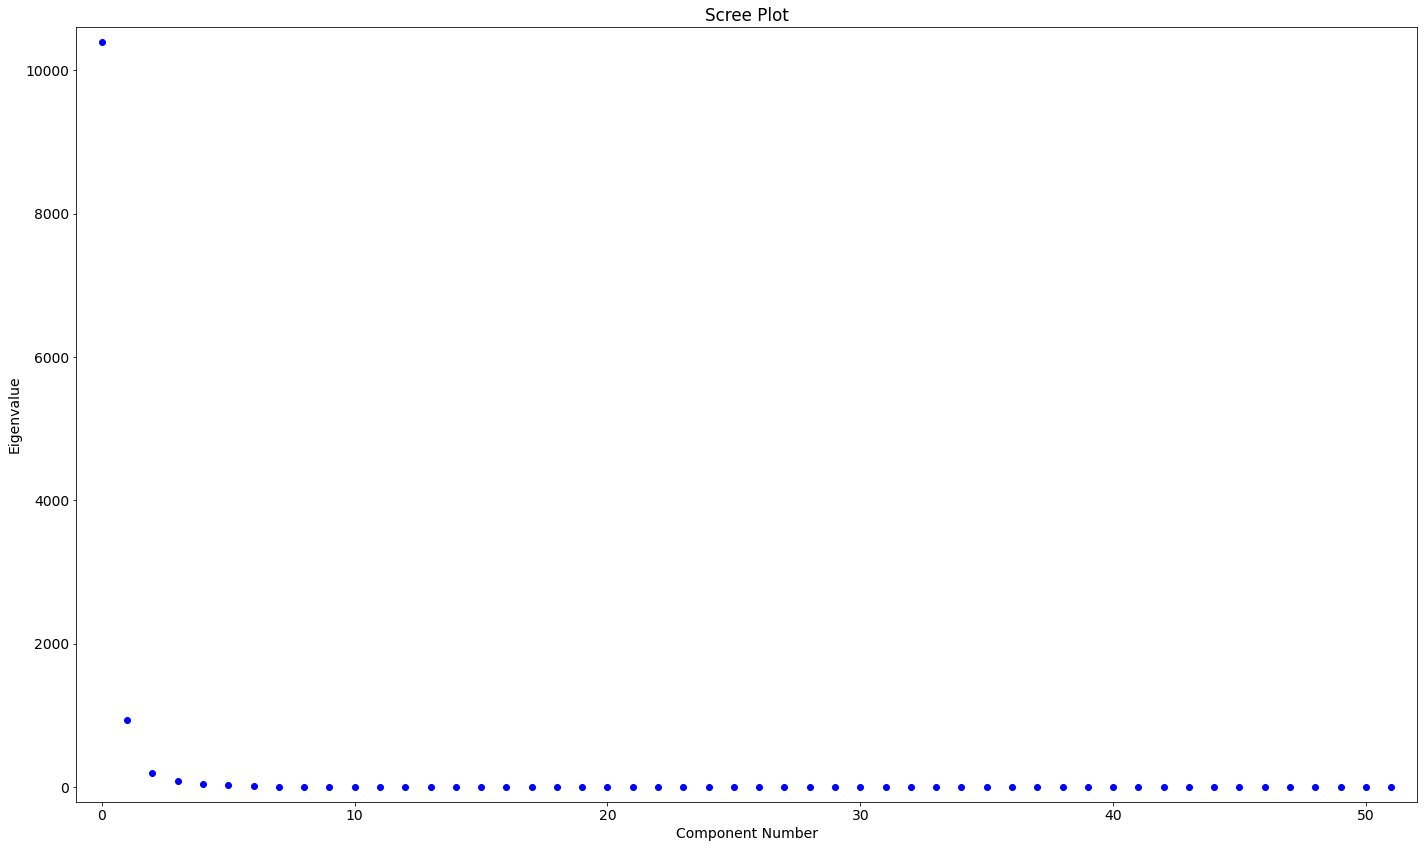

In [7]:
fig = pca_model.plot_scree(log_scale=False)

Ensuite, nous allons tracer les composants principaux.

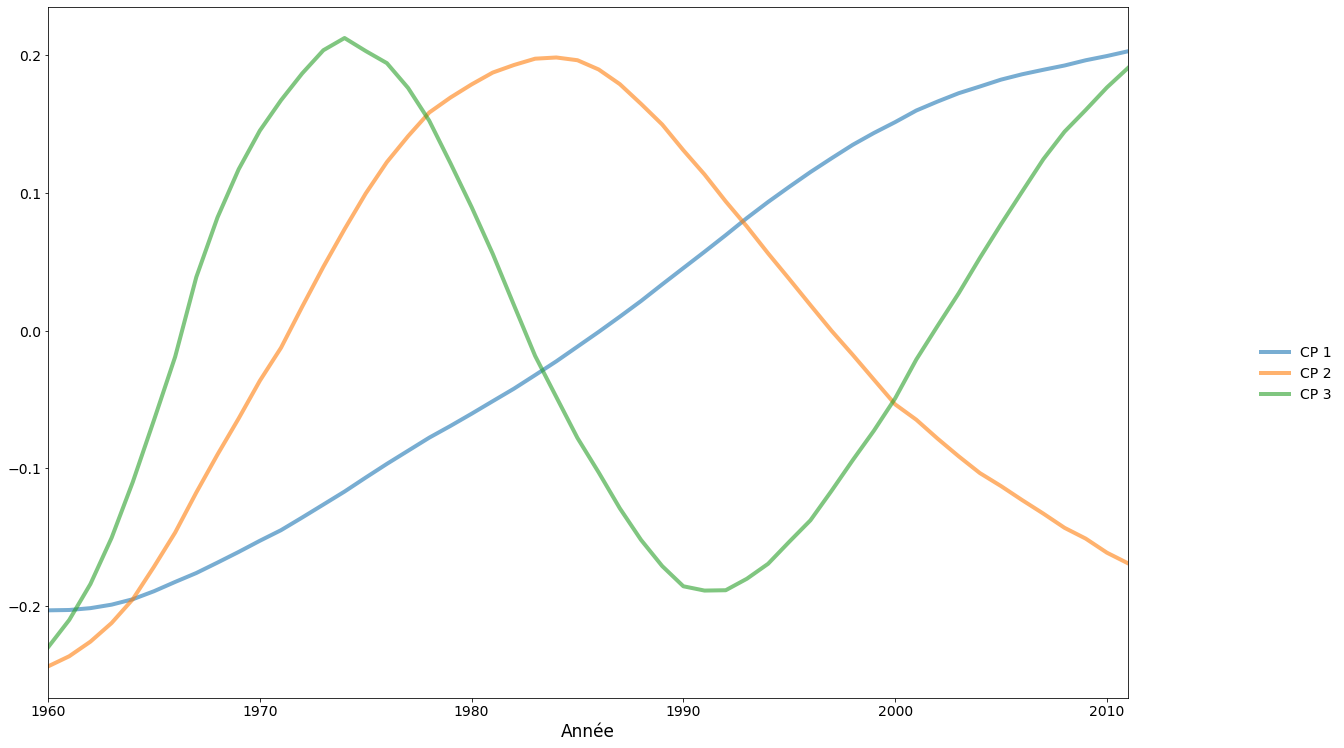

In [11]:
fig, ax = plt.subplots(figsize=(20, 12))
lines = ax.plot(pca_model.factors.iloc[:, :3], lw=4, alpha=0.6)
ax.set_xticks(dta.columns.values[::10])
ax.set_xlim(0, 51)
ax.set_xlabel("Année", size=17)
fig.subplots_adjust(0.1, 0.1, 0.85, 0.9)
legend = fig.legend(lines, ["CP 1", "CP 2", "CP 3"], loc="center right")
legend.draw_frame(False)

```{admonition} Bilan
:class: tip
Le facteur dominant est monotone et croissant. Les pays ayant un score positif sur le premier facteur augmenteront plus rapidement (ou diminueront plus lentement) par rapport à la moyenne indiquée ci-dessus. Les pays ayant un score négatif sur le premier facteur diminueront plus rapidement que la moyenne. Le deuxième facteur est en forme de U avec un pic positif aux alentours de $1985$. Les pays ayant un score positif important sur le deuxième facteur auront une fécondité inférieure à la moyenne au début et à la fin de la plage de données, mais une fécondité supérieure à la moyenne au milieu de la plage.
```

Pour mieux comprendre le résultat, on trace les trajectoires de fécondité pour des ensembles de pays ayant des scores similaires pour les composants principaux. La fonction suivante produit un tel tracé :

In [12]:
idx = pca_model.loadings.iloc[:, 0].argsort()

Tout d'abord, nous représentons les cinq pays ayant obtenu les meilleurs résultats pour la première composante. Ces pays ont un taux d'augmentation de la fécondité plus élevé que la moyenne mondiale (qui est en baisse).

In [16]:
def make_plot(labels):
    fig, ax = plt.subplots(figsize=(20, 12))
    ax = dta.loc[labels].T.plot(legend=False, grid=False, ax=ax)
    dta.mean().plot(ax=ax, grid=False, label="Mean")
    ax.set_xlim(0, 51)
    fig.subplots_adjust(0.1, 0.1, 0.75, 0.9)
    ax.set_xlabel("Année", size=17)
    ax.set_ylabel("Fertilité", size=17)
    legend = ax.legend(
        *ax.get_legend_handles_labels(), loc="center left", bbox_to_anchor=(1, 0.5)
    )
    legend.draw_frame(False)

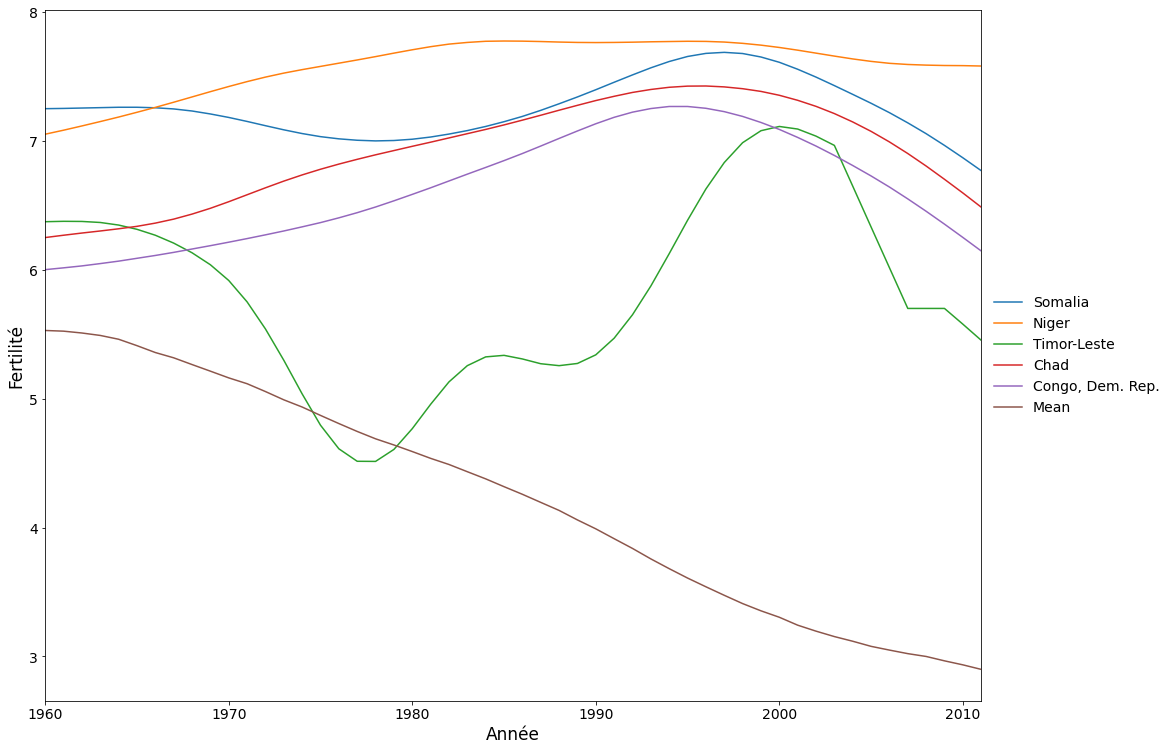

In [17]:
labels = dta.index[idx[-5:]]
make_plot(labels)

Voici les cinq pays qui ont obtenu les meilleurs scores pour le facteur 2. Il s'agit de pays qui ont atteint un pic de fécondité vers 1980, plus tard qu'une grande partie du reste du monde, suivi d'une baisse rapide de la fécondité.

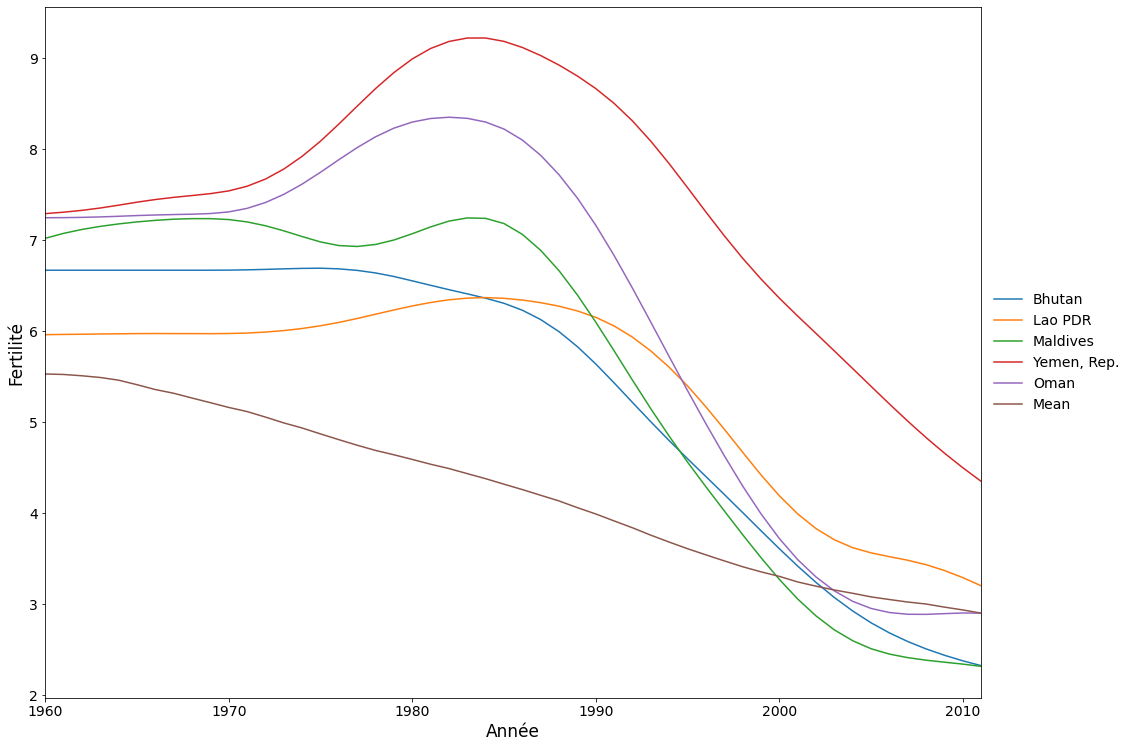

In [18]:
idx = pca_model.loadings.iloc[:, 1].argsort()
make_plot(dta.index[idx[-5:]])

Enfin, nous avons les pays ayant les scores les plus négatifs pour le deuxième composant. Il s'agit des pays où le taux de fécondité a diminué beaucoup plus rapidement que la moyenne mondiale au cours des années 1960 et 1970, puis s'est stabilisé.

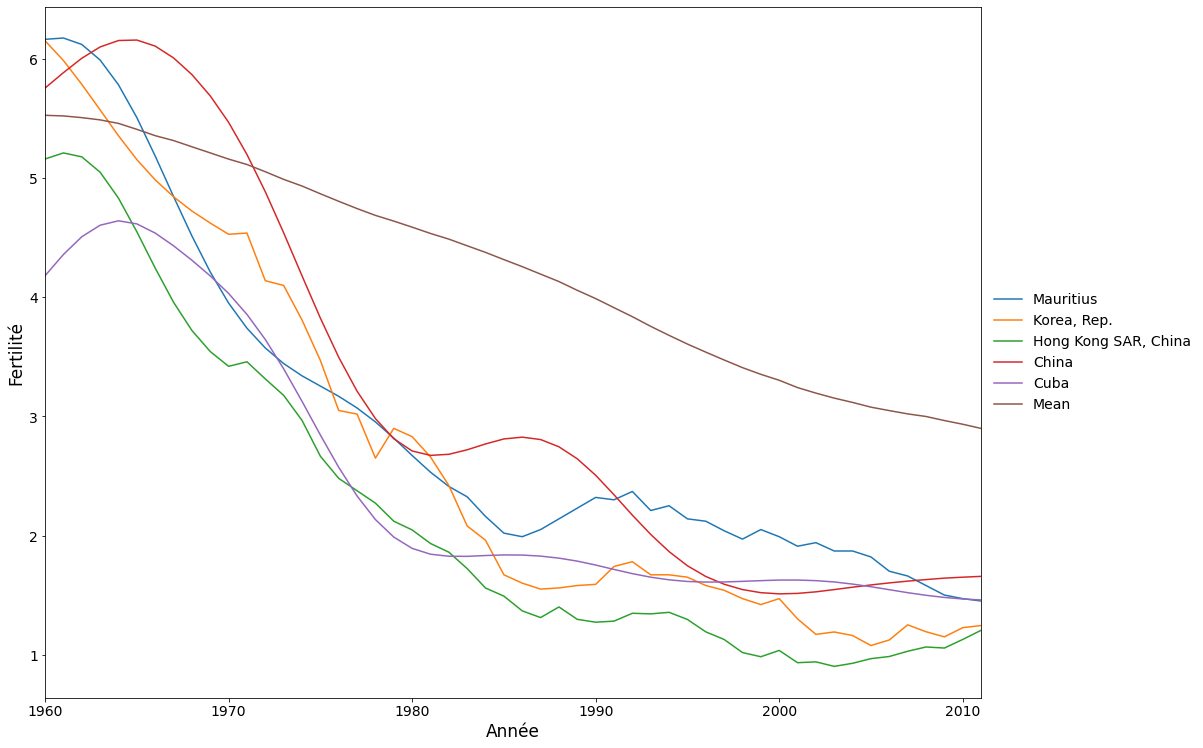

In [19]:
make_plot(dta.index[idx[:5]])

On peut également examiner un nuage de points des deux premières composantes principales. Force est de constater que la variation entre les pays est assez continue, sauf que les deux pays ayant les scores les plus élevés pour la deuxième composante sont quelque peu séparés des autres points. Ces pays, Oman et le Yémen, ont la particularité d'avoir un pic de fécondité autour de 1980. Aucun autre pays ne présente un tel pic. En revanche, les pays ayant obtenu des scores élevés pour le premier composant (dont la fécondité augmente de façon continue) font partie d'un continuum de variations.

array(['Oman', 'Yemen, Rep.'], dtype=object)

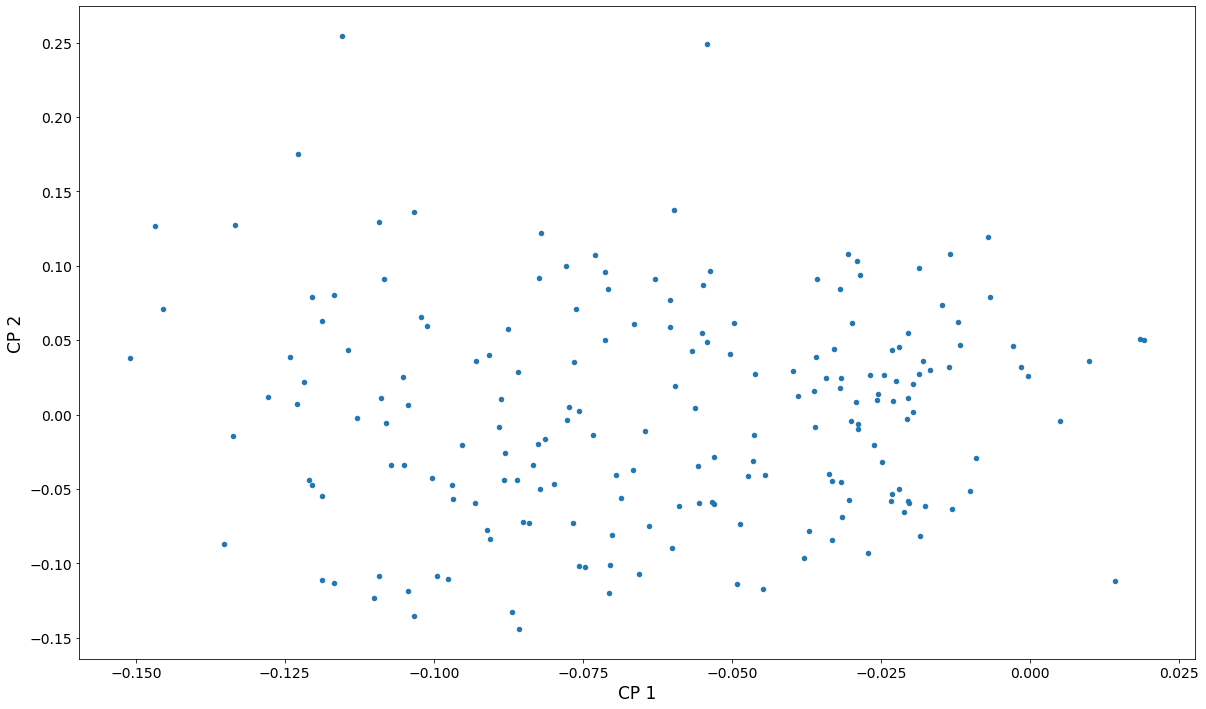

In [20]:
fig, ax = plt.subplots()
pca_model.loadings.plot.scatter(x="comp_00", y="comp_01", ax=ax)
ax.set_xlabel("CP 1", size=17)
ax.set_ylabel("CP 2", size=17)
dta.index[pca_model.loadings.iloc[:, 1] > 0.2].values